In [116]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager
matplotlib.font_manager._rebuild()
matplotlib.rcParams['font.family'] = ['Heiti TC']
import seaborn as sns
from scipy import stats
import numpy as np
import datetime
import re
import seaborn as sns
from scipy import stats

In [2]:
pd.set_option('display.max_colwidth', 1000)

In [4]:
dfSorted = pd.read_csv('./dataframes/firstStage_train_updatedDatetime_clean.csv') 

In [5]:
dfSorted.columns

Index(['fact', 'lawArticle', 'accusation', 'moneyPunishment', 'criminalName',
       'deathPenalty', 'imprisonment', 'lifeImprisonment', 'dateTime',
       'province_CN', 'province_EN', 'city_CN', 'city_EN', 'County_CN'],
      dtype='object')

In [7]:
dfSorted[['fact', 'dateTime']].sample()

,fact,dateTime
241195,"兰州市城关区人民检察院指控，1、2011年9月27日下午,被告人李某甲伙同胡某某（已判决）、何某某（已判决）、陈某（已判决）、车某某（已判决）、赵某某（另案处理）在兰州市城关区甘南路1号华某家超市门口，盗得丁某上衣口袋内白色步步高牌滑盖彩屏手机1部，实物价值人民币600元。作案后，赃物变卖，赃款挥霍。\r\n2、2011年10月10日17时许，被告人李某甲伙同胡某某（已判决）、何某某（已判决）、陈某（已判决）、车某某（已判决）、赵某某（另案处理）等人在兰州市城关区甘南路1号华某家超市门口，盗得仇某某上衣口袋内咖啡色联想牌TD16型手机1部，实物价值人民币200元。作案后，赃物变卖，赃款挥霍。\r\n3、2011年10月30日12时50分许，被告人李某甲伙同胡某某（已判决）、何某某（已判决）、陈某（已判决）、车某某（已判决）、赵某某（另案处理）等人在兰州市城关区甘南路2号东方大酒店门口，盗得马某上衣口袋内黑色苹果牌四代手机1部，实物价值人民币3738元。作案后，赃物变卖，赃款挥霍。\r\n4、2011年11月18日19时40分许，被告人李某甲伙同胡某某（已判决）、何某某（已判决）、陈某（已判决）、车某某（已判决）、赵某某（另案处理）等人在兰州市城关区天水路兰州大学门口北侧公交车站，盗得刘某上衣口袋内红色诺基亚牌E63型手机1部，实物价值人民币950元，作案后，赃物变卖，赃款挥霍。\r\n5、2011年12月1日20时许，被告人李某甲伙同胡某某（已判决）、何某某（已判决）、陈某（已判决）、车某某（已判决）、赵某某（另案处理）等人在兰州市城关区甘南路1号华某家超市门口，盗得柴某某上衣口袋内黑色三星牌i8150型手机1部，实物价值人民币2800元。作案后，赃物变卖，赃款挥霍。\r\n6、2011年12月5日15时30分许，被告人李某甲伙同胡某某（已判决）、何某某（已判决）、陈某（已判决）、车某某（已判决）、赵某某（另案处理）等人在兰州市城关区甘南路1号华某家超市门口，盗得卢某某上衣口袋内咖啡色诺基亚牌6300型手机1部，实物价值人民币500元。作案后，赃物变卖，赃款挥霍。\r\n7、2011年12月6日19时许，被告人李某甲伙同胡某某（已判决）、何某某（已判决）、陈某（已判决）、车某某（已判决）、赵某某（另案处理）等人在兰州市城关区甘南路1号华某家超市门口，盗得敬某...",2011-9-27


## GetDate

In [41]:
# def parseFactTime2(factData):
    
#     mat = re.search(r"(\d{4}年(?:\d{1,2}月){0,1}(?:\d{1,2}日){0,1})", factData)
#     #print(mat.groups())
#     # ('2016-12-12',)
    
#     year = '0000'
#     month = '01'
#     date = '01'
    
#     dateArray = []
    
#     if mat:
#         for idx, item in enumerate(mat.groups()):
#             dateString = item
#             yearSplit = dateString.split('年')
#             year = yearSplit[0]
#             month = '01'
#             date = '01'
#             if yearSplit[1]:
#                 monthSplit = yearSplit[1].split('月')
#                 month = monthSplit[0]
#                 if monthSplit[1]:
#                     date = monthSplit[1].split('日')[0]
            
#             dateArray.append(year + '-' + month + '-' + date)
            
#         dates = [datetime.datetime.strptime(ts, "%Y-%m-%d") for ts in dateArray]
#         dates.sort(reverse=True)
#         dateStringSorted=[datetime.datetime.strftime(ts, "%Y-%m-%d") for ts in dates]
# #         print(dateStringSorted)
#         latestDate = dateStringSorted[0]
#         return latestDate

#     else:
#         return 'NoDateFound'
    


In [44]:
def parseFactTime2YearOnly(factData):
    
    mat = re.search(r"(\d{4}年)", factData)
    
    yearArray = []
    
    if mat:
        for idx, item in enumerate(mat.groups()):
            dateString = item
            yearSplit = dateString.split('年')
            year = int(yearSplit[0])
            yearArray.append(year)
            
        yearArray.sort(reverse=True)
        latestDate = str(yearArray[0])
        return latestDate

    else:
        return 'NoDateFound'
    


In [25]:
#  timestamps = ['2011-06-2', '2011-08-05', '2011-02-04', '2010-1-14', '2010-12-13', '2010-1-12', '2010-2-11', '2010-2-07', '2010-12-02', '2011-11-30', '2010-11-26', '2010-11-23', '2010-11-22', '2010-11-16']


In [26]:
# dates = [datetime.datetime.strptime(ts, "%Y-%m-%d") for ts in timestamps]

In [27]:
# dates.sort(reverse=True)

In [24]:
# dates

In [28]:
# sorteddates = [datetime.datetime.strftime(ts, "%Y-%m-%d") for ts in dates]

In [23]:
# sorteddates

In [29]:
facts = dfSorted['fact'].tolist()

In [45]:
factYear = []
for fact in facts:
#     print(fact)
    factYear.append(parseFactTime2YearOnly(fact))

In [46]:
len(factYear)

1328584

In [47]:
len(facts)

1328584

In [48]:
dfSorted['factLatestYear'] = factYear

In [160]:
len(dfSorted[dfSorted['province_EN'] =='Xinjiang'])

7649

In [49]:
dfSortedHasYear = dfSorted[dfSorted['factLatestYear'] != 'NoDateFound']

In [50]:
len(dfSortedHasYear)

1316068

In [51]:
XJCasesHasYear = dfSortedHasYear[dfSortedHasYear['province_EN'] =='Xinjiang']

In [54]:
len(XJCasesHasYear)

7555

In [115]:
XJCasesHasYear[['fact', 'factLatestYear']].sample()

,fact,factLatestYear
1082421,乌鲁木齐市天山区人民检察院指控，2015年4月29日，公安机关从被告人谭某某经营的位于乌鲁木齐市天山区南门地下街先锋商城一厅34号店内，及其租赁的位于乌鲁木齐市沙依巴克区长江路江南后巷22号楼4单元201室的仓库内，查获其私自购进并准备对外销售的假冒耐某牌运动鞋1526双、假冒乔某牌运动鞋856双。经鉴定，上述物品均系假冒他人注册商标的商品，1526双假冒耐某牌运动鞋价值人民币152600元，856双假冒乔某牌运动鞋价值人民币94160元，以上合计价值人民币246760元。,2015


In [117]:
XJyears = XJCasesHasYear['factLatestYear'].tolist()

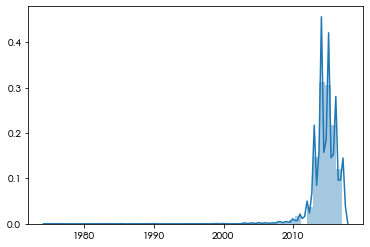

In [118]:
sns.distplot(XJyears)

### Counts and percentages

In [120]:
natioanlYear = dfSortedHasYear['factLatestYear'].value_counts(sort=True, ascending=False)



In [166]:
pd.set_option('display.max_rows', None)

In [167]:
natioanlYear

2014    291505
2015    290425
2016    258243
2013    192716
2017    116670
2012     70028
2011     34826
2010     17944
2009     11360
2008      8981
2007      5871
2006      3974
2005      2851
2004      2151
2003      1679
2002      1212
2000       876
2001       860
1998       580
1999       571
1997       433
1996       360
1995       312
1994       274
1993       228
1992       166
1991       119
1990       114
1989        69
1988        64
1984        52
1980        44
1985        42
1987        38
1986        37
1982        33
1983        29
2104        22
1981        18
1979        17
1978        15
2103        13
1974        12
1973        12
1975        10
2107        10
2106         9
2105         9
2018         8
1977         8
1970         7
1968         7
1969         6
3013         6
1958         6
1944         6
2019         6
1943         5
1971         5
1938         5
1961         5
2023         4
2020         4
1952         4
1957         4
1964         4
114       

In [126]:
XJYear = XJCasesHasYear['factLatestYear'].value_counts(sort=True, ascending=False)

In [143]:
XJYear

2014    1979
2015    1946
2016    1387
2013     941
2017     773
2012     230
2011     106
2010      58
2008      31
2009      29
2005      13
2007      12
2006      12
2004      10
2003       9
1999       3
2000       3
1990       2
1985       2
1998       2
1997       2
2001       1
1996       1
1984       1
1995       1
1975       1
Name: factLatestYear, dtype: int64

In [147]:
# sorted(XJYear.keys(), reverse=True)

In [154]:
yearlyXJCasesPercent = {}
for year in sorted(XJYear.keys()):
    yearlyXJCasesPercent[year] = (XJYear[year] / natioanlYear[year])*100

In [155]:
yearlyXJCasesPercent

{'1975': 10.0,
 '1984': 1.9230769230769231,
 '1985': 4.761904761904762,
 '1990': 1.7543859649122806,
 '1995': 0.3205128205128205,
 '1996': 0.2777777777777778,
 '1997': 0.4618937644341801,
 '1998': 0.3448275862068966,
 '1999': 0.5253940455341506,
 '2000': 0.3424657534246575,
 '2001': 0.11627906976744186,
 '2003': 0.5360333531864204,
 '2004': 0.46490004649000466,
 '2005': 0.45598035776920376,
 '2006': 0.3019627579265224,
 '2007': 0.2043944813490036,
 '2008': 0.3451731433025276,
 '2009': 0.25528169014084506,
 '2010': 0.32322781988408383,
 '2011': 0.30437029805317867,
 '2012': 0.3284400525504084,
 '2013': 0.48828327694638746,
 '2014': 0.6788905850671515,
 '2015': 0.6700525092536799,
 '2016': 0.5370910344133238,
 '2017': 0.6625524985000428}

Text(0, 0.5, 'percent (%)')

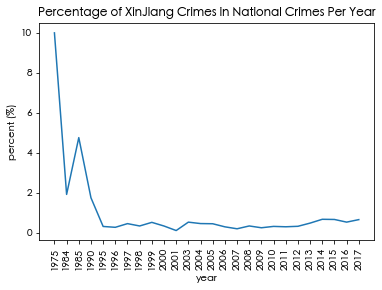

In [159]:
plt.plot(list(yearlyXJCasesPercent.keys()),list(yearlyXJCasesPercent.values()))
plt.xticks(rotation=90)
plt.title('Percentage of XinJiang Crimes in National Crimes Per Year')
plt.xlabel('year')
plt.ylabel("percent (%)")
